In [1]:
import sys

In [2]:
sys.path.insert(0, "/Users/bbeidel/git/nn-food-classifier")
sys.path.insert(0, "/Users/bbeidel/git/nn-food-classifier/src")

In [3]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [4]:
import pandas
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [5]:
from src.data.make_dataset import get_train_data

In [6]:
X_train, Y_train, classes = get_train_data()

In [7]:
X_train.shape

(10099, 32, 32, 3)

In [8]:
Y_train.shape

(10099, 101)

In [9]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

def plot_images(n_images, X, Y, classes):
    plt.figure(figsize=(10,10))
    for i in range(n_images):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
        label_assignment = Y_train[i]
        label_name = classes[label_assignment].item().decode("utf-8")
        plt.xlabel(label_name)
    plt.show()

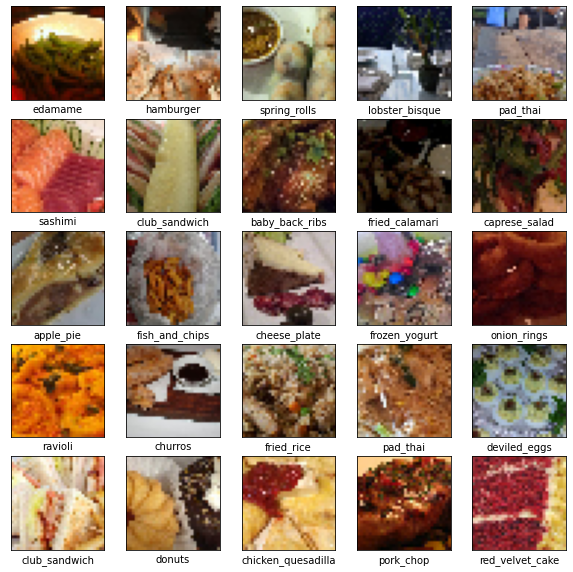

In [10]:
plot_images(25, X_train, Y_train, classes)

In [11]:
X_rescaled = X_train / 255.0

X_rescaled.shape

(10099, 32, 32, 3)

In [50]:
# model dimensions aren't right....
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(101)
])

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
X_rescaled.shape

(10099, 32, 32, 3)

In [53]:
Y_train.shape

(10099, 101)

In [54]:
Y = Y_train * 1.0

In [55]:
model.fit(X_rescaled, Y, epochs=10)

Epoch 1/10


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,101] and labels shape [3232]
	 [[node loss_5/dense_14_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at /Users/bbeidel/git/nn-food-classifier/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_3969]

Function call stack:
keras_scratch_graph
